In [1]:
# -*- coding: utf-8 -*-
"""
Created on Sun Dec  5 12:53:49 2021

@author: Andrey.Bezrukov
"""

import time
from datetime import datetime
import os
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import interpolate
from sklearn.cluster import DBSCAN
import numpy as np

##################################################
####### define  functions 
##################################################

class file_Sorption:
    
    def read_file(self, path, filename):
        #print(path +'/'+ filename)        
        col_names = []
        
        with open(path+filename, 'r') as f:
            for line in f:
                if line != '\n':
                    #print(line)
                    col_names.append(line.split(' = ')[1].replace(' ', '').replace('\n', '').replace('Â°', 'o'))
                else: break
        print(col_names)

        # import data
        df = pd.read_csv(path+filename, skiprows=len(col_names)+2,  sep='\s+', names=col_names)
        df = df.dropna()
        #print(df.head())
        df['Time(minute)'] = df['Time(minute)'].astype(float)
        #print(df.info())
        #print(df['Time(minute)'].describe())
        self.filename = filename
        self.instrument = 'IGA'
        self.sample_mass = 0
        self.fluid = 'water vapor'
        comments  = 'na'
        method = 'na'
        # renaming columns to common notation
        df = df[['Time(minute)', 'TotalWeight(mg)', 'InletBNITROGEN(ml/min)', 'InletBNITROGEN(ml/min)', 'Sample(oC)', 'Sample(oC)']]
        df.columns = ['time', 'uptake', 'RH_target', 'RH_actual', 'temp_target', 'temp_actual']
        self.temperature = 'Actual Sample Temp: {0:.2f} +- {1:.2f}'.format(df[df.temp_target==df.temp_target.min()].temp_actual.mean(), df[df.temp_target==df.temp_target.min()].temp_actual.std())
        self.equilibration_interval = '---'
        self.comments = comments
        self.method = method
        self.data = df
        #print(self.__dict__.keys())
        # test if import was correct
        if (list(self.__dict__.keys()) == ['filename', 'instrument', 'sample_mass', 'fluid', 'temperature', 'equilibration_interval', 'comments', 'method', 'data'])  :
            print('File {0} read succesfull'.format(filename))
            self.import_success = True
        else:
            self.import_success = False
        plt.plot(df.time, df.uptake)
        plt.plot(df.time, df.RH_target)
        plt.show()



In [2]:
text_size = 16

result = pd.DataFrame(columns=['name','isotherm','cycleNr','kinetics'], 
                      dtype=object
                     )

datetime_stamp = datetime.now().isoformat(timespec='seconds')

#os.mkdir(datetime_stamp+'/')

import_parameters = pd.read_csv('input_data.csv', sep=',')
import_parameters.cycleNr = import_parameters.cycleNr.astype('int32')
print(import_parameters)

                                       path_kinetics filename_kinetics  \
0  ../../../../data/CO2_sorption/IGA/Sample_0233/...          Data.txt   
1  ../../../../data/CO2_sorption/IGA/Sample_0234/...          Data.txt   
2  ../../../../data/CO2_sorption/IGA/Sample_0235/...          Data.txt   

                          path_isotherm  \
0  ../../../../data/CO2_sorption/3Flex/   
1  ../../../../data/CO2_sorption/3Flex/   
2  ../../../../data/CO2_sorption/3Flex/   

                          filename_isotherm  color         name  cycleNr  \
0  20230115_AAB-5-51-53_exAcCN_CO2_298K.csv  green        ZIF-7        0   
1    AAB-6-71_25-50um_CO2_298K_20230918.csv  green  Zeolite_13X        1   
2            AAB-6-85_CO2_298K_20231027.csv  green      ROS-040        1   

  analyze  window1  window2  flow  adstmax  destmax  
0       Y       20       10   200        5       20  
1       Y       30       10   200        5      100  
2       Y       30       10   200        5       25  


path_kinetics        ../../../../data/CO2_sorption/IGA/Sample_0233/...
filename_kinetics                                             Data.txt
path_isotherm                     ../../../../data/CO2_sorption/3Flex/
filename_isotherm             20230115_AAB-5-51-53_exAcCN_CO2_298K.csv
color                                                            green
name                                                             ZIF-7
cycleNr                                                              0
analyze                                                              Y
window1                                                             20
window2                                                             10
flow                                                               200
adstmax                                                              5
destmax                                                             20
Name: 0, dtype: object
['Time(minute)', 'TotalWeight(mg)', 'Pressure(1)(mbar)

C:\Users\Andrey.Bezrukov\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  # This is added back by InteractiveShellApp.init_path()


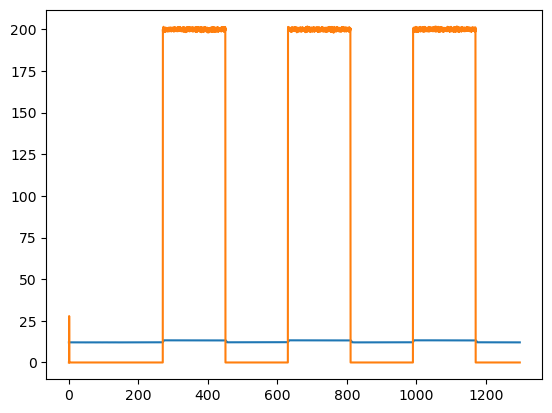

                                              action      time
0  Set Flow Composition and Pressure Inlet A NITR...     0.063
1  Ramp temperature at 20°C/min to 100°C using th...     0.153
2       Set temperature to 25°C using the Water Bath   180.180
3  Set Flow Composition and Pressure Inlet B NITR...   270.208
4  Set Flow Composition and Pressure Inlet A NITR...   450.217
5  Set Flow Composition and Pressure Inlet B NITR...   630.246
6  Set Flow Composition and Pressure Inlet A NITR...   810.262
7  Set Flow Composition and Pressure Inlet B NITR...   990.282
8  Set Flow Composition and Pressure Inlet A NITR...  1170.296
270.208
450.217
630.246
810.262
990.282
1170.296
[16200, 26992, 37787, 48581, 59375, 70170]
[16200, 37787, 59375, 77826]
[26992, 48581, 70170]
Intersection:  [3.826163243010612, 4.1381821793322615]
0.3
350.15
175.225
262.6875
218.95625
197.090625
208.0234375
202.55703125
199.82382812499998
198.45722656249998
Fitting parameters: k:  198.45722656249998
        ads     R

C:\Users\Andrey.Bezrukov\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:290: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.


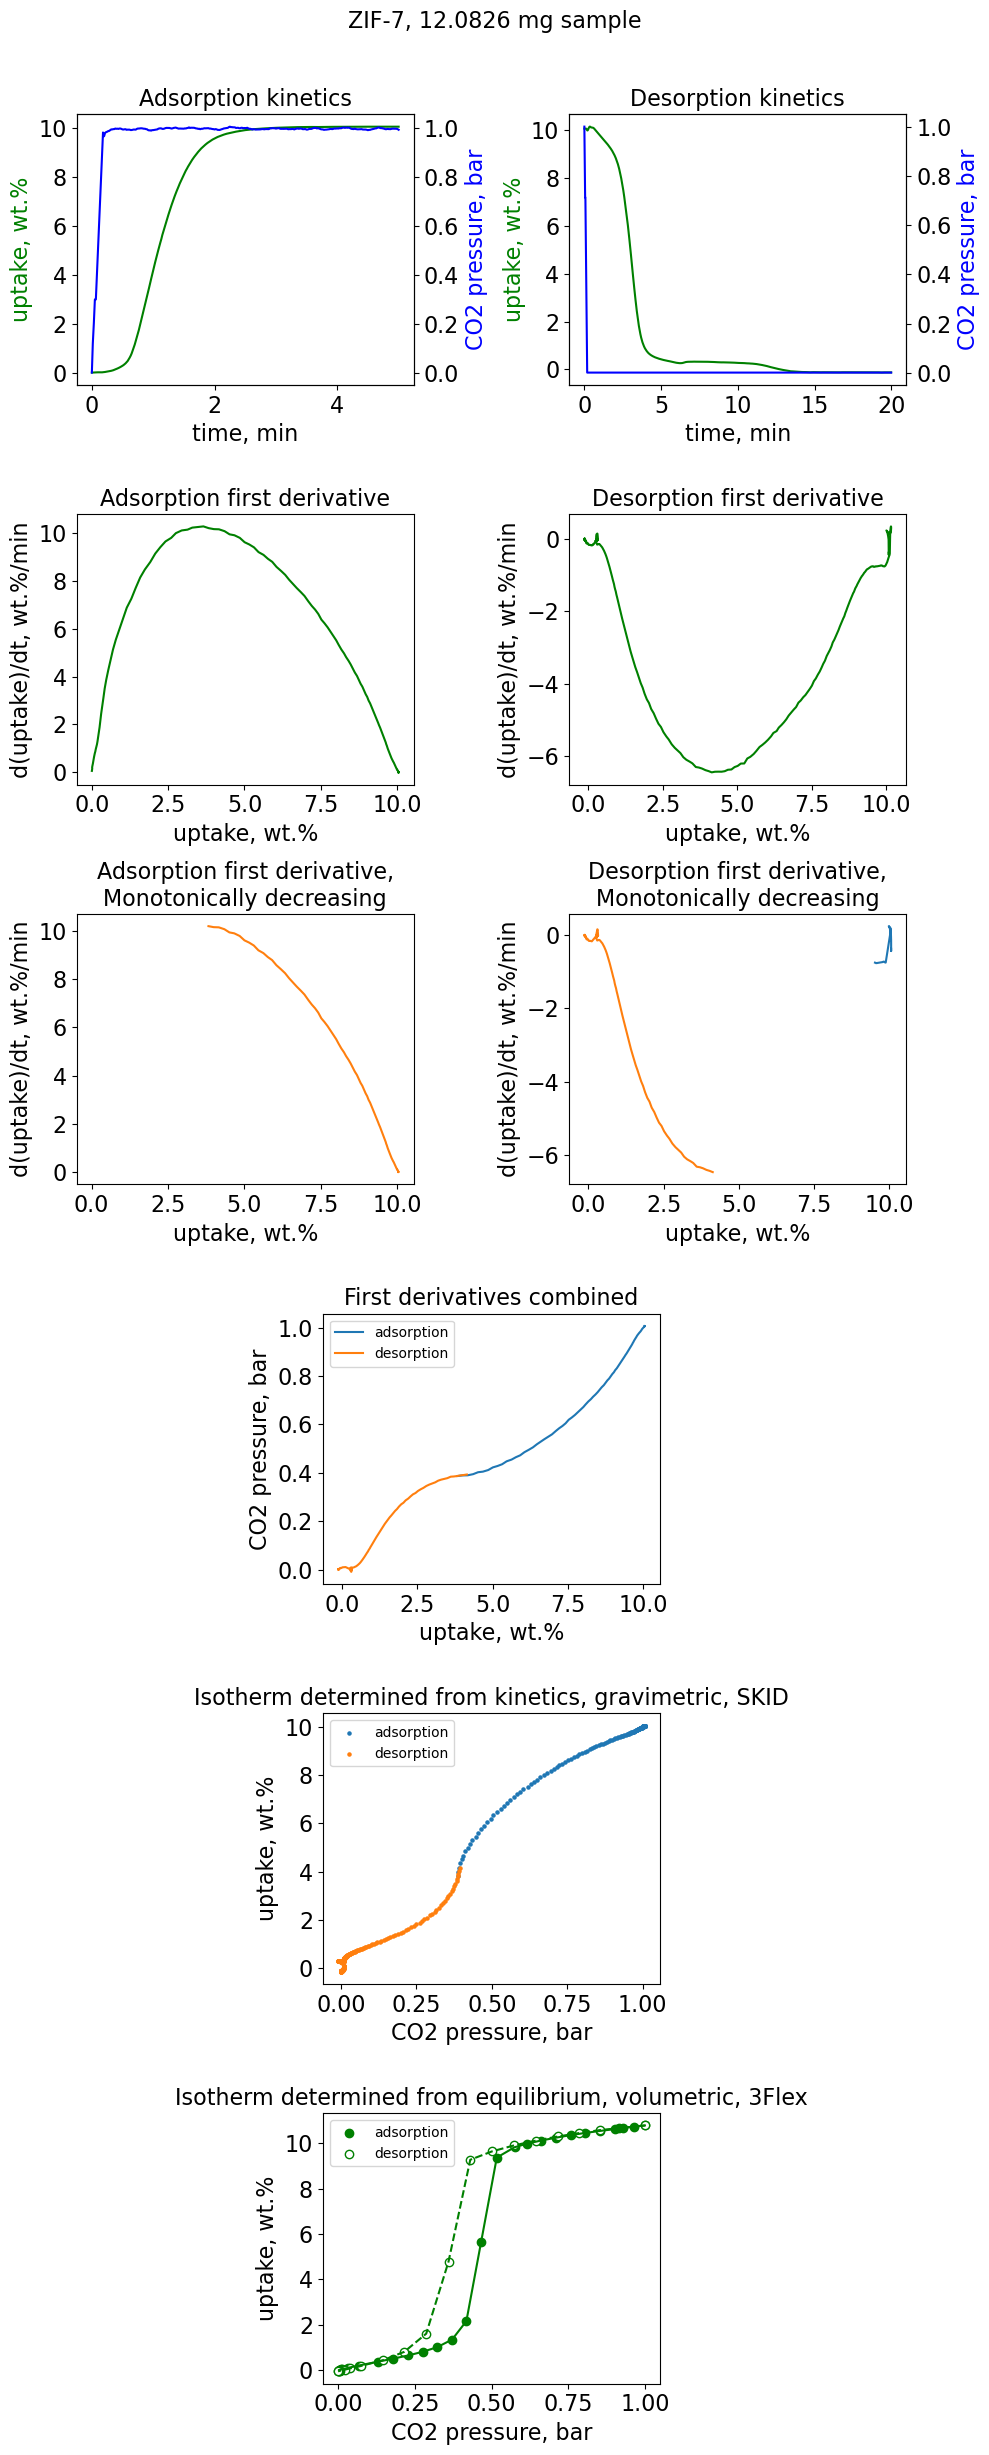

path_kinetics        ../../../../data/CO2_sorption/IGA/Sample_0234/...
filename_kinetics                                             Data.txt
path_isotherm                     ../../../../data/CO2_sorption/3Flex/
filename_isotherm               AAB-6-71_25-50um_CO2_298K_20230918.csv
color                                                            green
name                                                       Zeolite_13X
cycleNr                                                              1
analyze                                                              Y
window1                                                             30
window2                                                             10
flow                                                               200
adstmax                                                              5
destmax                                                            100
Name: 1, dtype: object
['Time(minute)', 'TotalWeight(mg)', 'Pressure(1)(mbar)

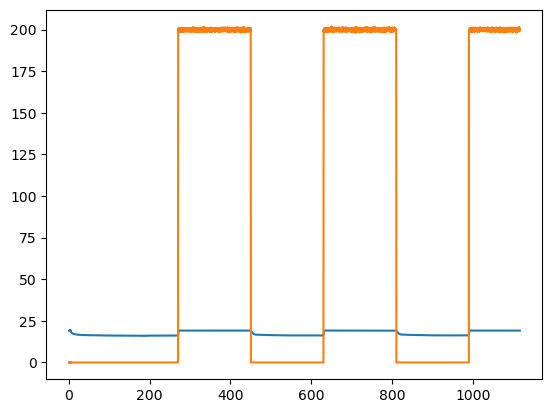

                                              action     time
0  Set Flow Composition and Pressure Inlet A NITR...    0.058
1  Ramp temperature at 20°C/min to 120°C using th...    0.147
2       Set temperature to 25°C using the Water Bath  180.179
3  Set Flow Composition and Pressure Inlet B NITR...  270.207
4  Set Flow Composition and Pressure Inlet A NITR...  450.233
5  Set Flow Composition and Pressure Inlet B NITR...  630.254
6  Set Flow Composition and Pressure Inlet A NITR...  810.280
7  Set Flow Composition and Pressure Inlet B NITR...  990.313
270.207
450.233
630.254
810.28
990.313
[16199, 26999, 37801, 48601, 59402]
[16199, 37801, 59402, 66970]
[26999, 48601]
Intersection:  [8.235752352453815, 9.388176523685289]
0.3
350.15
525.075
437.6125
393.88125
415.74687500000005
404.81406250000003
399.34765625
396.614453125
395.24785156250005
Fitting parameters: k:  395.24785156250005
        ads    RH_ads        des      RH_des
0  0.878770  0.021249  23.386036  760.376404
1  1.681979  0

C:\Users\Andrey.Bezrukov\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:290: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.


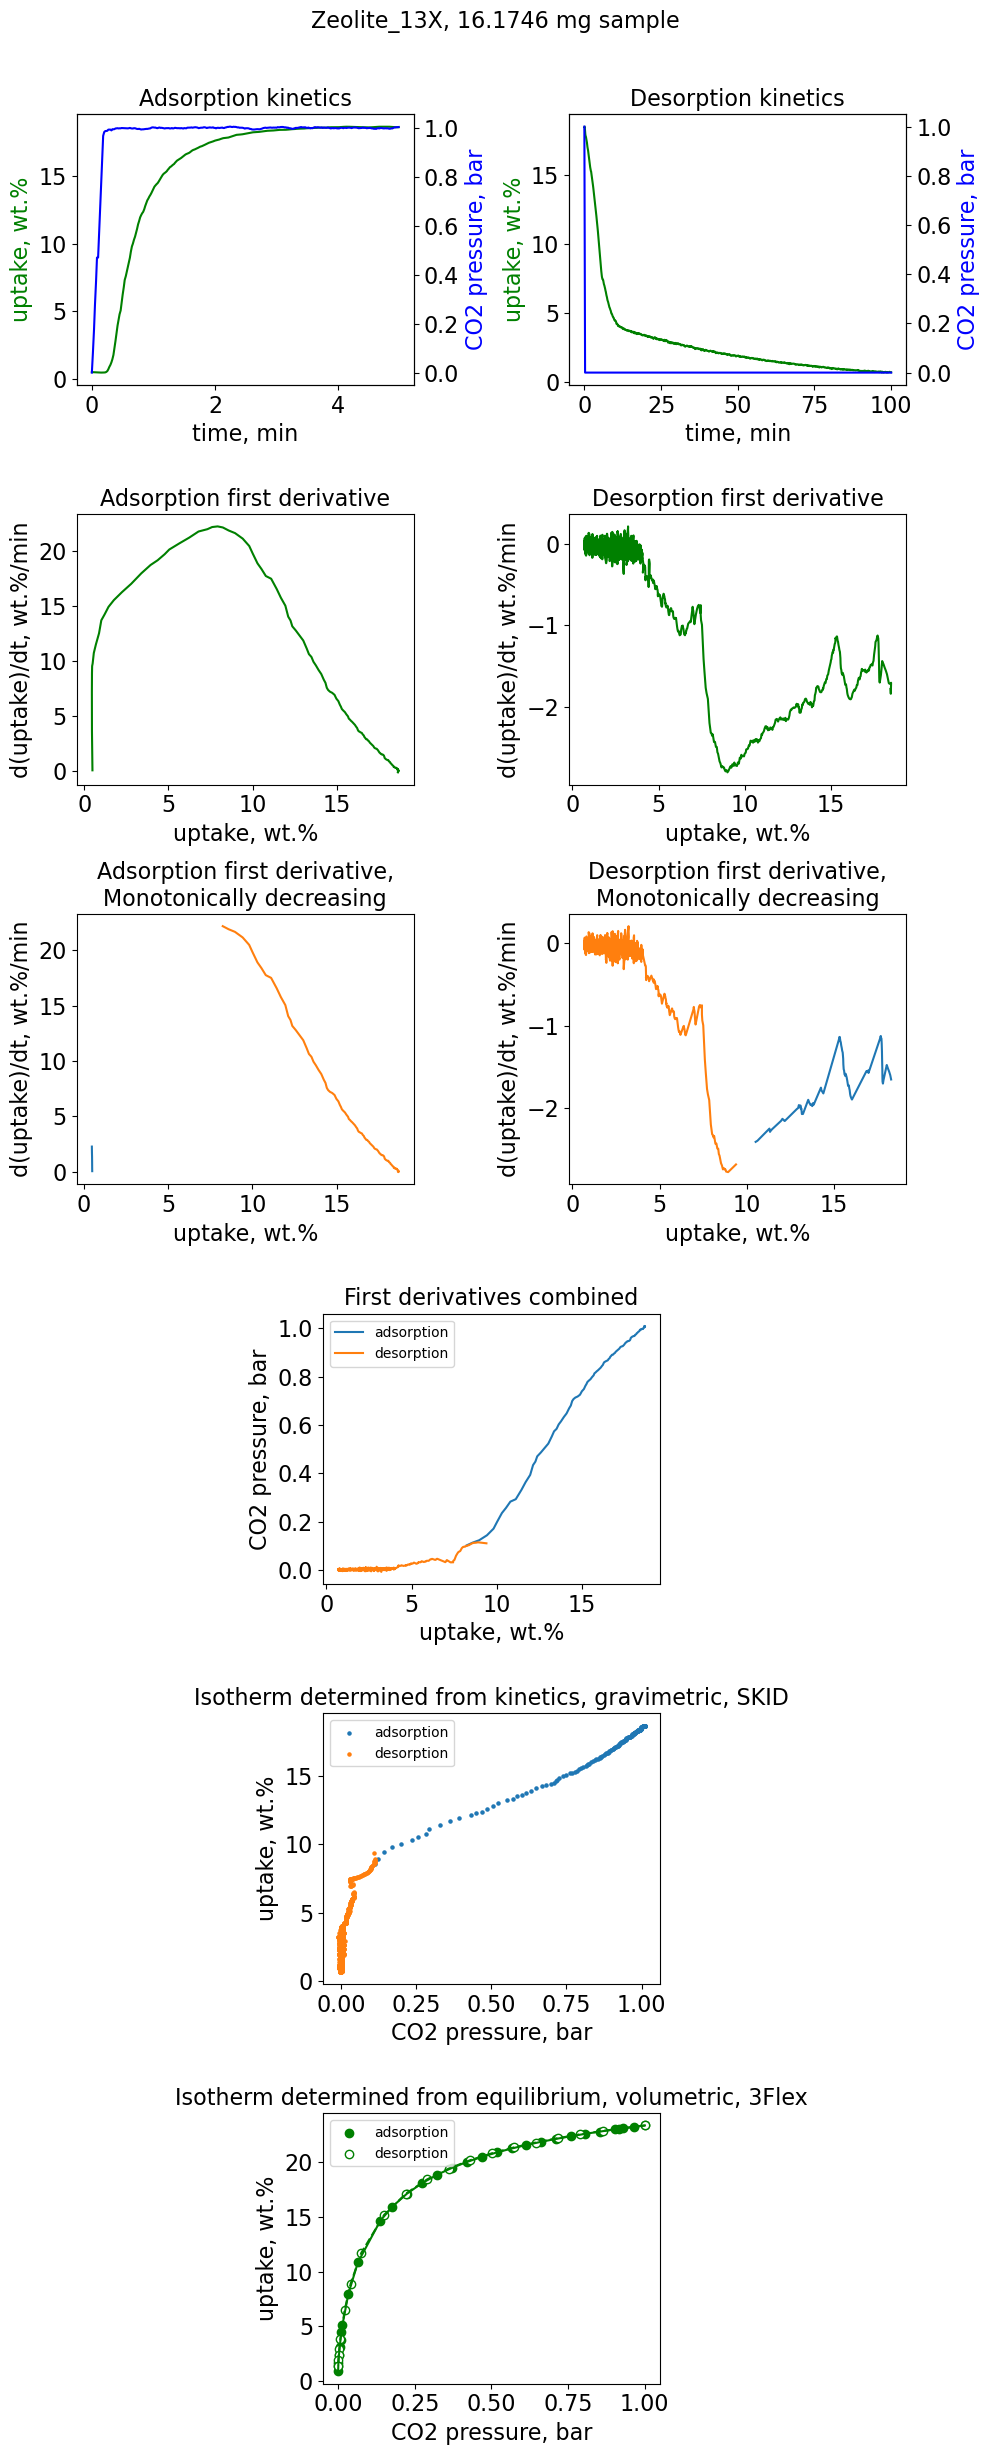

path_kinetics        ../../../../data/CO2_sorption/IGA/Sample_0235/...
filename_kinetics                                             Data.txt
path_isotherm                     ../../../../data/CO2_sorption/3Flex/
filename_isotherm                       AAB-6-85_CO2_298K_20231027.csv
color                                                            green
name                                                           ROS-040
cycleNr                                                              1
analyze                                                              Y
window1                                                             30
window2                                                             10
flow                                                               200
adstmax                                                              5
destmax                                                             25
Name: 2, dtype: object
['Time(minute)', 'TotalWeight(mg)', 'Pressure(1)(mbar)

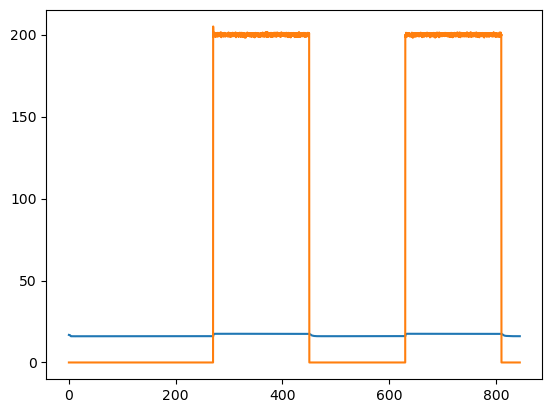

                                              action     time
0  Set Flow Composition and Pressure Inlet A NITR...    0.062
1  Ramp temperature at 20°C/min to 100°C using th...    0.109
2       Set temperature to 25°C using the Water Bath  180.134
3  Set Flow Composition and Pressure Inlet B NITR...  270.162
4  Set Flow Composition and Pressure Inlet A NITR...  450.185
5  Set Flow Composition and Pressure Inlet B NITR...  630.211
6  Set Flow Composition and Pressure Inlet A NITR...  810.233
270.162
450.185
630.211
810.233
[16200, 27000, 37801, 48601]
[16200, 37801, 50684]
[27000, 48601]
Intersection:  [3.9663678948123504, 4.368056984961626]
0.3
350.15
175.225
262.6875
218.95625
197.090625
208.0234375
213.48984375
210.756640625
209.3900390625
Fitting parameters: k:  209.3900390625
        ads     RH_ads        des      RH_des
0  0.202908   4.309762  10.982148  760.709839
1  0.382890   8.766735  10.426951  654.339661
2  0.569954  13.280500  10.091140  599.077148
3  1.002858  24.488838   

C:\Users\Andrey.Bezrukov\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:290: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.


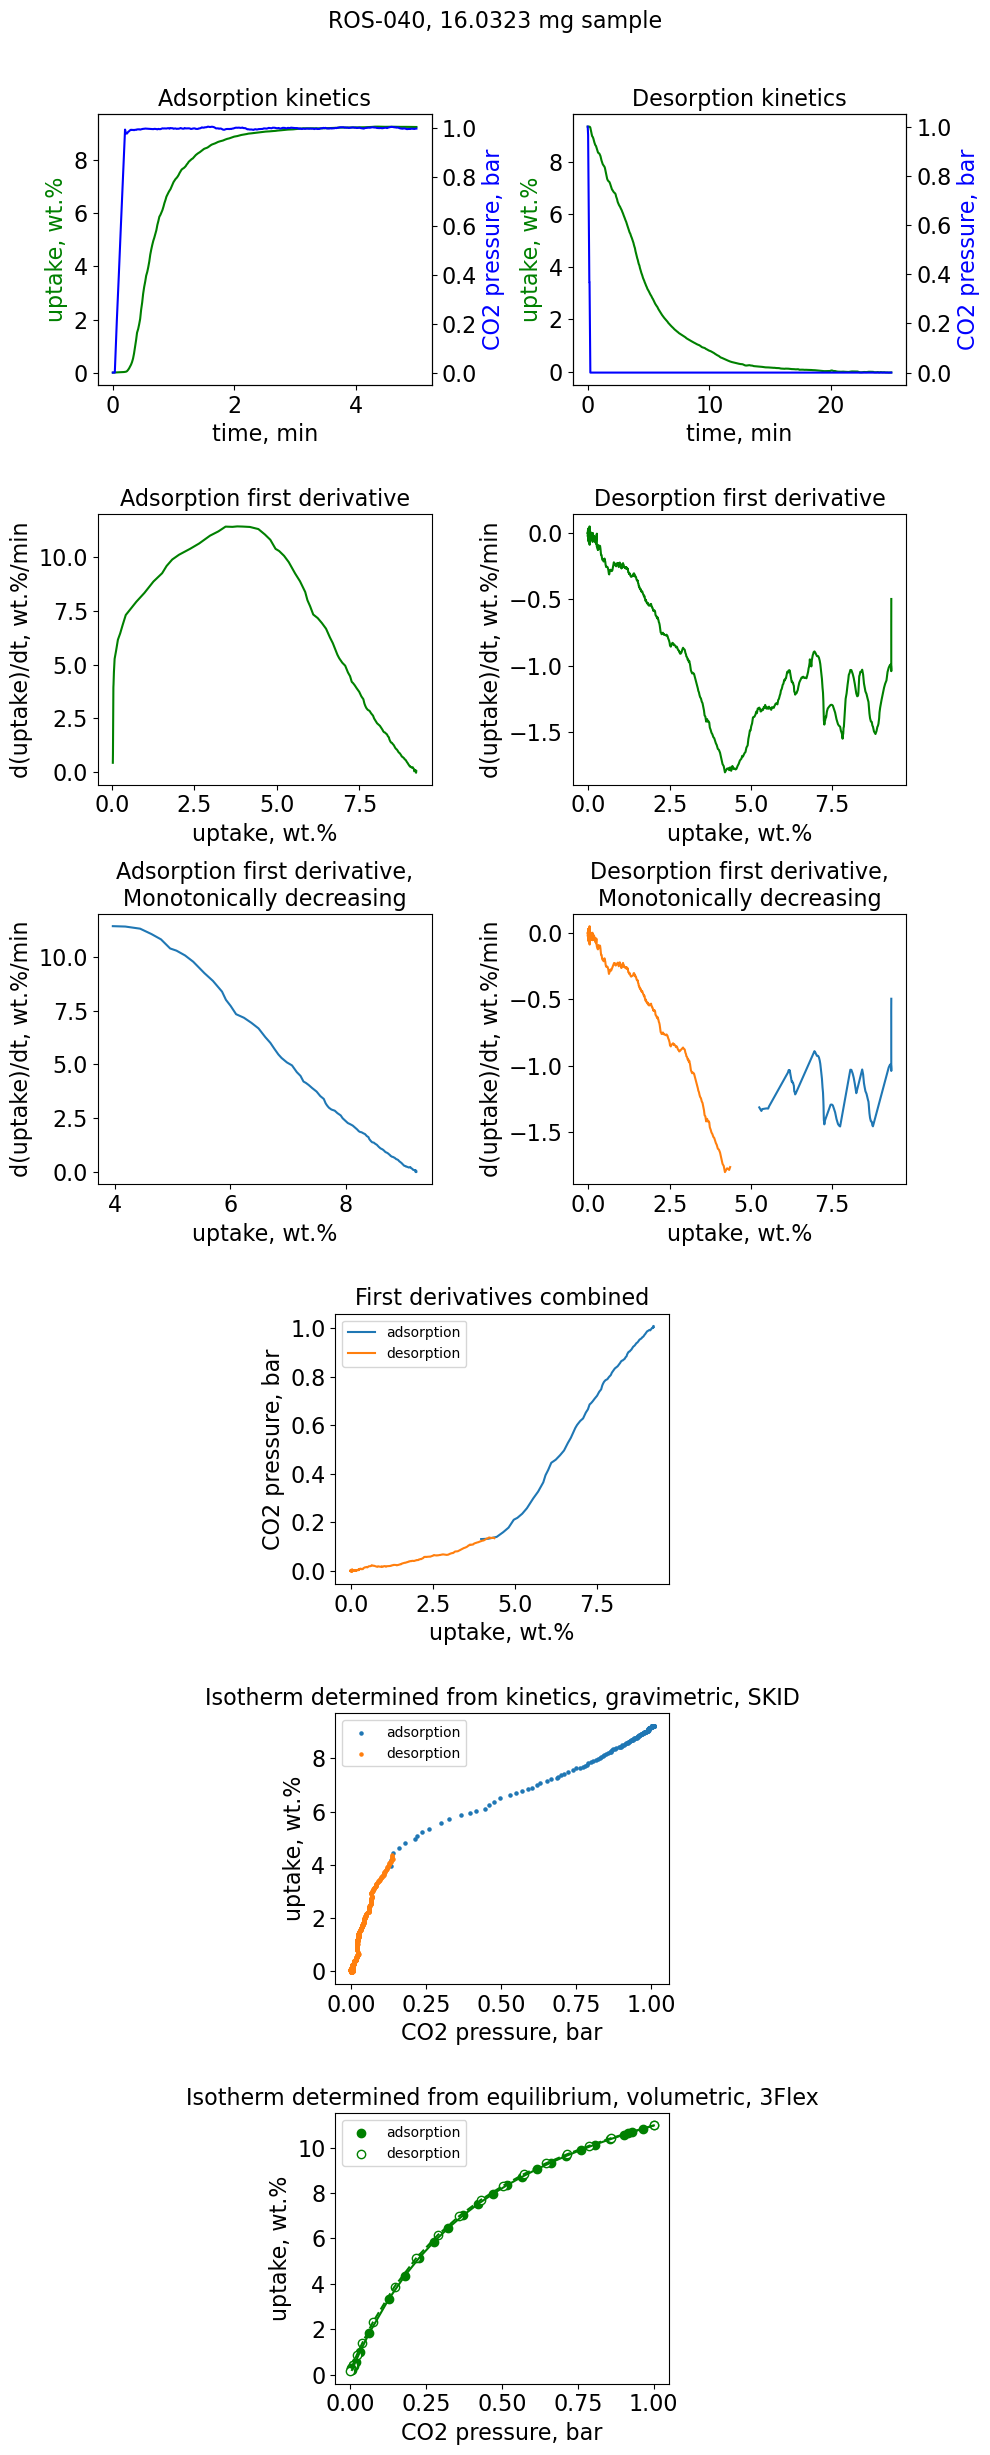

In [3]:
for indx in import_parameters[import_parameters.analyze=='Y'].index:
    print(import_parameters.iloc[indx, :])
    window1 = int(import_parameters.window1[indx])
    window2 = int(import_parameters.window2[indx])
    flow = int(import_parameters.flow[indx])
    adstmax = int(import_parameters.adstmax[indx])
    destmax = int(import_parameters.destmax[indx])
    ## import kinetics
    Sorption_kinetics = file_Sorption()
    try:
        Sorption_kinetics.read_file(import_parameters.path_kinetics[indx],import_parameters.filename_kinetics[indx])
        if Sorption_kinetics.import_success:
            if Sorption_kinetics.fluid != 'water vapor':
                del Sorption_kinetics
                print('Wrong fluid: ',Sorption_kinetics.fluid)
        else:
            del Sorption_kinetics
            print(import_parameters.filename_kinetics[indx], 'failed')
            continue
    except Exception as e:
        print(e)
        print(import_parameters.filename_kinetics[indx], 'failed')
        continue
        
    df_times = pd.read_csv(import_parameters.path_kinetics[indx] + 'EventFrameTimes.txt', names=['action', 'time']).dropna()
    print(df_times.head(15))
    split_index=[]
    
    for i in df_times[df_times.time>250].time.to_list():
        split_index.append((Sorption_kinetics.data['time']-i).abs().argsort()[0])
        print(i)
    #split_index = [i for i in split_index if i>250]
    print(split_index)
    split_index_ads = split_index[::2] + [Sorption_kinetics.data.index.max()]
    split_index_des = split_index[1::2] 
    print(split_index_ads)
    print(split_index_des)
    Sorption_kinetics.sample_mass = Sorption_kinetics.data.iloc[split_index_ads[0]].uptake
    Sorption_kinetics.data.uptake = Sorption_kinetics.data.uptake/Sorption_kinetics.sample_mass*100-100
    Sorption_kinetics.data.RH_target = Sorption_kinetics.data.RH_target/flow
    Sorption_kinetics.data.RH_actual = Sorption_kinetics.data.RH_actual/flow
    

    
    fig, ax = plt.subplot_mosaic(    
    """
    AABB
    CCDD
    EEFF
    .GG.
    .HH.
    .JJ.
    """
                              ,figsize=(10, 25), constrained_layout=True)
    fig.suptitle(''.join([import_parameters.name[indx], ', ', str(Sorption_kinetics.sample_mass), ' mg sample' ]),
                         fontsize=text_size)
    
    # uptake adsorption
    try:
        w_ads = pd.DataFrame({'time':Sorption_kinetics.data.iloc[split_index_ads[import_parameters.cycleNr[indx]]:split_index_des[import_parameters.cycleNr[indx]], :]['time'] - Sorption_kinetics.data.iloc[split_index_ads[import_parameters.cycleNr[indx]]:split_index_des[import_parameters.cycleNr[indx]], :]['time'].min(), 
                              'uptake':Sorption_kinetics.data.iloc[split_index_ads[import_parameters.cycleNr[indx]]:split_index_des[import_parameters.cycleNr[indx]], :]['uptake'],
                              'RH_actual':Sorption_kinetics.data.iloc[split_index_ads[import_parameters.cycleNr[indx]]:split_index_des[import_parameters.cycleNr[indx]], :]['RH_actual']
                              })
        w_ads = w_ads[w_ads.time<=adstmax]
    except Exception as e:
        print(e)
        continue
    ax['A'].plot(w_ads['time'],
                  w_ads['uptake'],
                  c=import_parameters.color[indx],
                  label=''.join([import_parameters.name[indx], ', ', str(Sorption_kinetics.sample_mass), ' mg' ])
                  )
    #ax['A'].legend()
    ax['A'].set_xlabel('time, min', fontsize=text_size)
    ax['A'].set_ylabel('uptake, wt.%', fontsize=text_size, c=import_parameters.color[indx])
    ax['A'].tick_params(axis='x', labelsize=text_size)
    ax['A'].tick_params(axis='y', labelsize=text_size)
    ax['A'].set_title('Adsorption kinetics', fontsize=text_size)
    ax2 = ax['A'].twinx()
    ax2.plot(w_ads['time'],
             w_ads['RH_actual'], 
             c='b'
             )
    ax2.set_ylabel('CO2 pressure, bar', fontsize=text_size, c='b')
    ax2.tick_params(axis='y', labelsize=text_size)
    
    # first derivative adsorption
    first_derivative_dwdt_ads = pd.DataFrame({'dwdt':(w_ads['uptake'].diff()/w_ads['time'].diff()).rolling(window=window1, min_periods=1, center=True).mean(),
                                              'uptake':w_ads['uptake']
                                              })
    ax['C'].plot(first_derivative_dwdt_ads['uptake'], 
                  first_derivative_dwdt_ads['dwdt'],
                  c=import_parameters.color[indx],
                  label=''.join([import_parameters.name[indx], ', ',str(Sorption_kinetics.sample_mass), ' mg' ])
                  )
    ax['C'].set_xlabel('uptake, wt.%', fontsize=text_size)
    ax['C'].set_ylabel('d(uptake)/dt, wt.%/min', fontsize=text_size)
    ax['C'].tick_params(axis='x', labelsize=text_size)
    ax['C'].tick_params(axis='y', labelsize=text_size)
    ax['C'].set_title('Adsorption first derivative', fontsize=text_size)
    
    # first derivative adsorption where second derivative is negatinve
    first_derivative_dwdt_dw_ads = pd.DataFrame({'dwdt_dw':(first_derivative_dwdt_ads['dwdt'].diff()/first_derivative_dwdt_ads['uptake'].diff()).rolling(window=window2, min_periods=1, center=True).mean(),
                                                 'uptake':first_derivative_dwdt_ads['uptake']
                                                 })
    def normalize(x):
        return (x-x.min())/(x.max()-x.min())
    X = np.array([[i[0], i[1]] for i in zip(normalize(first_derivative_dwdt_ads[first_derivative_dwdt_dw_ads['dwdt_dw']<0]['uptake']), normalize(first_derivative_dwdt_ads[first_derivative_dwdt_dw_ads['dwdt_dw']<0]['dwdt']))  ])
    clustering_ads = DBSCAN(eps=0.1, min_samples=1).fit(X)
    #print(clustering_ads.labels_)
    for i in list(set(clustering_ads.labels_)):    
        ax['E'].plot(first_derivative_dwdt_ads[first_derivative_dwdt_dw_ads['dwdt_dw']<0]['uptake'][clustering_ads.labels_==i],
                      first_derivative_dwdt_ads[first_derivative_dwdt_dw_ads['dwdt_dw']<0]['dwdt'][clustering_ads.labels_==i],
                      #c=import_parameters.color[indx],
                      label=''.join([import_parameters.name[indx], ', ', str(Sorption_kinetics.sample_mass), ' mg' ])
                      ) 
    ax['E'].set_xlabel('uptake, wt.%', fontsize=text_size)
    ax['E'].set_ylabel('d(uptake)/dt, wt.%/min', fontsize=text_size)
    ax['E'].tick_params(axis='x', labelsize=text_size)
    ax['E'].tick_params(axis='y', labelsize=text_size)
    ax['E'].set_title('Adsorption first derivative,\nMonotonically decreasing', fontsize=text_size)
    
    # uptake desorption
    try:
        w_des = pd.DataFrame({'time':Sorption_kinetics.data.iloc[split_index_des[import_parameters.cycleNr[indx]]:split_index_ads[import_parameters.cycleNr[indx]+1], :]['time'] - Sorption_kinetics.data.iloc[split_index_des[import_parameters.cycleNr[indx]]:split_index_ads[import_parameters.cycleNr[indx]+1], :]['time'].min(), 
                              'uptake':Sorption_kinetics.data.iloc[split_index_des[import_parameters.cycleNr[indx]]:split_index_ads[import_parameters.cycleNr[indx]+1], :]['uptake'],
                              'RH_actual':Sorption_kinetics.data.iloc[split_index_des[import_parameters.cycleNr[indx]]:split_index_ads[import_parameters.cycleNr[indx]+1], :]['RH_actual']
                              })
        w_des = w_des[w_des.time<=destmax]
    except Exception as e:
        print(e)
        continue      
    ax['B'].plot(w_des['time'],
                  w_des['uptake'],
                  c=import_parameters.color[indx],
                  label=''.join([import_parameters.name[indx], ', ', str(Sorption_kinetics.sample_mass), ' mg' ])
                  )
    #ax['B'].legend()
    ax['B'].set_xlabel('time, min', fontsize=text_size)
    ax['B'].set_ylabel('uptake, wt.%', fontsize=text_size, c=import_parameters.color[indx])
    ax['B'].tick_params(axis='x', labelsize=text_size)
    ax['B'].tick_params(axis='y', labelsize=text_size)
    ax['B'].set_title('Desorption kinetics', fontsize=text_size)
    ax3 = ax['B'].twinx()
    ax3.plot(w_des['time'],
             w_des['RH_actual'], 
             c='b'
             )
    ax3.set_ylabel('CO2 pressure, bar', fontsize=text_size, c='b')
    ax3.tick_params(axis='y', labelsize=text_size)
    
    # first derivative adsorption
    first_derivative_dwdt_des = pd.DataFrame({'dwdt':(w_des['uptake'].diff()/w_des['time'].diff()).rolling(window=window1, min_periods=1, center=True).mean(),
                                              'uptake':w_des['uptake']
                                              })
    ax['D'].plot(first_derivative_dwdt_des['uptake'], 
                  first_derivative_dwdt_des['dwdt'],
                  c=import_parameters.color[indx],
                  label=''.join([import_parameters.name[indx], ', ', str(Sorption_kinetics.sample_mass), ' mg' ])
                  )
    ax['D'].set_xlabel('uptake, wt.%', fontsize=text_size)
    ax['D'].set_ylabel('d(uptake)/dt, wt.%/min', fontsize=text_size)
    ax['D'].tick_params(axis='x', labelsize=text_size)
    ax['D'].tick_params(axis='y', labelsize=text_size)
    ax['D'].set_title('Desorption first derivative', fontsize=text_size)
    
    # first derivative desorption where second derivative is negatinve
    first_derivative_dwdt_dw_des = pd.DataFrame({'dwdt_dw':(first_derivative_dwdt_des['dwdt'].diff()/first_derivative_dwdt_des['uptake'].diff()).rolling(window=window2, min_periods=1, center=True).mean(),
                                                 'uptake':first_derivative_dwdt_des['uptake']
                                                 })
    def normalize(x):
        return (x-x.min())/(x.max()-x.min())
    X = np.array([[i[0], i[1]] for i in zip(normalize(first_derivative_dwdt_des[first_derivative_dwdt_dw_des['dwdt_dw']<0]['uptake']), normalize(first_derivative_dwdt_des[first_derivative_dwdt_dw_des['dwdt_dw']<0]['dwdt']))  ])
    clustering_des = DBSCAN(eps=0.1, min_samples=1).fit(X)
    #print(clustering_des.labels_)
    for i in list(set(clustering_des.labels_)):    
        ax['F'].plot(first_derivative_dwdt_des[first_derivative_dwdt_dw_des['dwdt_dw']<0]['uptake'][clustering_des.labels_==i],
                          first_derivative_dwdt_des[first_derivative_dwdt_dw_des['dwdt_dw']<0]['dwdt'][clustering_des.labels_==i],
                          #c=import_parameters.color[indx],
                          label=''.join([import_parameters.name[indx], ', ', str(Sorption_kinetics.sample_mass), ' mg' ])
                          )
    ax['F'].set_xlabel('uptake, wt.%', fontsize=text_size)
    ax['F'].set_ylabel('d(uptake)/dt, wt.%/min', fontsize=text_size)
    ax['F'].tick_params(axis='x', labelsize=text_size)
    ax['F'].tick_params(axis='y', labelsize=text_size)
    ax['F'].set_title('Desorption first derivative,\nMonotonically decreasing', fontsize=text_size)
    
    ### perform RH calibration
    ### use DVS adventure k for TGA pan = 0.3
    k_adventure_TGA_min = 0.01
    k_adventure_TGA_max = 700
    k_adventure_TGA_start = 0.3
    
    try:
        
        f_des = interpolate.interp1d(first_derivative_dwdt_des['uptake'],  first_derivative_dwdt_des['dwdt'], fill_value="extrapolate")
        def interpolate_first_derivative_dwdt_dw_des(t):
            return f_des(t)
        f_ads = interpolate.interp1d(first_derivative_dwdt_ads['uptake'],  first_derivative_dwdt_ads['dwdt'], fill_value="extrapolate")
        def interpolate_first_derivative_dwdt_dw_ads(t):
            return f_ads(t)
        
        first_derivative_dwdt_dw_intersection = [first_derivative_dwdt_ads['uptake'][first_derivative_dwdt_dw_ads['dwdt_dw']<0][clustering_ads.labels_==np.bincount(clustering_ads.labels_).argmax()].min(),
                                                first_derivative_dwdt_des['uptake'][first_derivative_dwdt_dw_des['dwdt_dw']<0][clustering_des.labels_==np.bincount(clustering_des.labels_).argmax()].max()]
        print('Intersection: ',first_derivative_dwdt_dw_intersection)
        desdata_interpolated = interpolate_first_derivative_dwdt_dw_des(first_derivative_dwdt_ads[(first_derivative_dwdt_ads.uptake>first_derivative_dwdt_dw_intersection[0])&(first_derivative_dwdt_ads.uptake<first_derivative_dwdt_dw_intersection[1])]['uptake'])
        adsdata_interpolated = interpolate_first_derivative_dwdt_dw_ads(first_derivative_dwdt_ads[(first_derivative_dwdt_ads.uptake>first_derivative_dwdt_dw_intersection[0])&(first_derivative_dwdt_ads.uptake<first_derivative_dwdt_dw_intersection[1])]['uptake'])
        RH_max = Sorption_kinetics.data.iloc[split_index_ads[import_parameters.cycleNr[indx]]:split_index_des[import_parameters.cycleNr[indx]], :]['RH_target'].max()
        
        for attempt in range(10):
            if attempt == 0:
                k_adventure_TGA = k_adventure_TGA_start
            else:
                k_adventure_TGA = (k_adventure_TGA_min+k_adventure_TGA_max)/2
            print(k_adventure_TGA)
            if ((-desdata_interpolated/k_adventure_TGA*Sorption_kinetics.sample_mass)<(RH_max - adsdata_interpolated/k_adventure_TGA*Sorption_kinetics.sample_mass)).all():
                k_adventure_TGA_max = k_adventure_TGA
            else: 
                k_adventure_TGA_min = k_adventure_TGA

        print('Fitting parameters: k: ',k_adventure_TGA)
        
        first_derivative_dwdt_ads['dwdt_scaled'] = RH_max - first_derivative_dwdt_ads['dwdt']/k_adventure_TGA*Sorption_kinetics.sample_mass
        first_derivative_dwdt_des['dwdt_scaled'] = -first_derivative_dwdt_des['dwdt']/k_adventure_TGA*Sorption_kinetics.sample_mass  
        ax['G'].plot(first_derivative_dwdt_ads[first_derivative_dwdt_dw_ads['dwdt_dw']<0][clustering_ads.labels_==np.bincount(clustering_ads.labels_).argmax()]['uptake'],
                     RH_max - first_derivative_dwdt_ads[first_derivative_dwdt_dw_ads['dwdt_dw']<0][clustering_ads.labels_==np.bincount(clustering_ads.labels_).argmax()]['dwdt']/k_adventure_TGA*Sorption_kinetics.sample_mass, 
                     label='adsorption')
        ax['G'].plot(first_derivative_dwdt_des[first_derivative_dwdt_dw_des['dwdt_dw']<0][clustering_des.labels_==np.bincount(clustering_des.labels_).argmax()]['uptake'],
                     -first_derivative_dwdt_des[first_derivative_dwdt_dw_des['dwdt_dw']<0][clustering_des.labels_==np.bincount(clustering_des.labels_).argmax()]['dwdt']/k_adventure_TGA*Sorption_kinetics.sample_mass,
                     label='desorption')
        ax['G'].set_ylabel('CO2 pressure, bar', fontsize=text_size)
        ax['G'].set_xlabel('uptake, wt.%', fontsize=text_size)
        ax['G'].tick_params(axis='x', labelsize=text_size)
        ax['G'].tick_params(axis='y', labelsize=text_size)
        ax['G'].set_title('First derivatives combined', fontsize=text_size)
        ax['G'].legend()
        #ax[0, 2].set_title(popt)
    
        ax['H'].scatter(first_derivative_dwdt_ads[first_derivative_dwdt_dw_ads['dwdt_dw']<0][clustering_ads.labels_==np.bincount(clustering_ads.labels_).argmax()]['dwdt_scaled'],
                         first_derivative_dwdt_ads[first_derivative_dwdt_dw_ads['dwdt_dw']<0][clustering_ads.labels_==np.bincount(clustering_ads.labels_).argmax()]['uptake'],
                     #c=import_parameters.color[indx],
                     label='adsorption',
                     s=5)
        ax['H'].scatter(first_derivative_dwdt_des[first_derivative_dwdt_dw_des['dwdt_dw']<0][clustering_des.labels_==np.bincount(clustering_des.labels_).argmax()]['dwdt_scaled'],
                         first_derivative_dwdt_des[first_derivative_dwdt_dw_des['dwdt_dw']<0][clustering_des.labels_==np.bincount(clustering_des.labels_).argmax()]['uptake'],
                     #c=import_parameters.color[indx],
                     label='desorption',
                     s=5)
        ax['H'].set_xlabel('CO2 pressure, bar', fontsize=text_size)
        ax['H'].set_ylabel('uptake, wt.%', fontsize=text_size)
        ax['H'].tick_params(axis='x', labelsize=text_size)
        ax['H'].tick_params(axis='y', labelsize=text_size)
        ax['H'].set_title('Isotherm determined from kinetics, gravimetric, SKID', fontsize=text_size)
        ax['H'].legend()  
        
    except Exception as e: 
        print(e)
        pass
    
    # plot experimental isotherm
    try:
        df_isotherm = pd.read_csv(import_parameters.path_isotherm[indx]+import_parameters.filename_isotherm[indx], 
                              names=['ads','RH_ads','des','RH_des'], skiprows=1)
        print(df_isotherm.head())
        exp_isotherm_ads = df_isotherm[['ads','RH_ads']]
        exp_isotherm_des = df_isotherm[['des','RH_des']]
        
        ax['J'].plot(exp_isotherm_ads.RH_ads/760, exp_isotherm_ads.ads,
                     c=import_parameters.color[indx],)
        ax['J'].plot(exp_isotherm_des.RH_des/760, exp_isotherm_des.des,
                     c=import_parameters.color[indx], linestyle='dashed')
        ax['J'].scatter(exp_isotherm_ads.RH_ads/760, exp_isotherm_ads.ads,
                        c=import_parameters.color[indx],
                       label='adsorption',)
        ax['J'].scatter(exp_isotherm_des.RH_des/760, exp_isotherm_des.des,
                        facecolors='w', edgecolors=import_parameters.color[indx],
                       label='desorption',)
        ax['J'].set_ylabel('uptake, wt.%', fontsize=text_size)
        ax['J'].set_xlabel('CO2 pressure, bar', fontsize=text_size)
        ax['J'].tick_params(axis='x', labelsize=text_size)
        ax['J'].tick_params(axis='y', labelsize=text_size)
        ax['J'].set_title('Isotherm determined from equilibrium, volumetric, 3Flex', fontsize=text_size)
        ax['J'].legend()
        

    except Exception as e: 
        print(e)
        pass

    fig.tight_layout(rect=[0, 0, 1, 0.97])
    plt.savefig(import_parameters.name[indx]+'.png', dpi=300)
    plt.show()
